Steps were taken in the project:
1. Denoising the video frames using blurring kernel;
2. rayscaling and detecting edges on the frames with Canny edge detection;
3. Drawing region of interest to embed lanes on the video frame;
4. Perspective warping;
5. Segmentation of lanes using vertical histogram projection;
6. Detecting lines on the video frame using Hough Lines Polar and line optimization;
7. Displaying lines on the frame;
8. Turn prediction;
9. Whole process orchestrator;

https://towardsdatascience.com/tutorial-build-a-lane-detector-679fd8953132

https://automaticaddison.com/the-ultimate-guide-to-real-time-lane-detection-using-opencv/

https://shirolepranav.github.io/blog/computer%20vision/opencv/2020/08/30/lane-detection.html

# Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL as ImageGrab
import pyautogui as py
import pydirectinput
import keyboard
import numpy as np
import cv2 as cv
import os
import math

import time
import os

# Image Processing

In [2]:
def capture_screenshots(num_screenshots, delay=1, save_dir="screenshots"):
    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i in range(num_screenshots):
        # Capture screenshot
        screenshot = py.screenshot(region=(5,30, 847, 542))
        
        # Save the screenshot to the specified directory with a unique filename
        save_path = os.path.join(save_dir, f'screenshot_{i+1}.png')
        screenshot.save(save_path)
        
        print(f'Screenshot {i+1} saved at {save_path}')
        
        # Add delay between screenshots
        time.sleep(delay)
    
    print(f"{num_screenshots} screenshots captured and saved in {save_dir}!")

# Example: Take 10 screenshots with a 1-second delay between each, store them in "my_game_screenshots" directory
capture_screenshots(50, delay=1, save_dir="my_game_screenshots")

Screenshot 1 saved at my_game_screenshots\screenshot_1.png
Screenshot 2 saved at my_game_screenshots\screenshot_2.png
Screenshot 3 saved at my_game_screenshots\screenshot_3.png
Screenshot 4 saved at my_game_screenshots\screenshot_4.png
Screenshot 5 saved at my_game_screenshots\screenshot_5.png
Screenshot 6 saved at my_game_screenshots\screenshot_6.png
Screenshot 7 saved at my_game_screenshots\screenshot_7.png
Screenshot 8 saved at my_game_screenshots\screenshot_8.png
Screenshot 9 saved at my_game_screenshots\screenshot_9.png
Screenshot 10 saved at my_game_screenshots\screenshot_10.png
Screenshot 11 saved at my_game_screenshots\screenshot_11.png
Screenshot 12 saved at my_game_screenshots\screenshot_12.png
Screenshot 13 saved at my_game_screenshots\screenshot_13.png
Screenshot 14 saved at my_game_screenshots\screenshot_14.png
Screenshot 15 saved at my_game_screenshots\screenshot_15.png
Screenshot 16 saved at my_game_screenshots\screenshot_16.png
Screenshot 17 saved at my_game_screenshots

KeyboardInterrupt: 

In [4]:
def takeSS():
    im = py.screenshot('image.png',region=(5,30, 847, 542))
    # Change the format that OpenCV can understand
    img = np.array(im)
    img_cvt = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    # cv.imshow("das", img_cvt)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    return img_cvt

takeSS()

array([[[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       ...,

       [[ 80, 148,  48],
        [ 79, 144,  49],
        [ 79, 146,  50],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[ 80, 140,  52],
        [ 82, 142,  53],
        [ 82, 144,  51],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[ 83, 140,  54],
        [ 84, 140,  52],
        [ 82, 140,  50],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]]

# Brightness

# Scalling

# Simple threshold for segmentation

In [ ]:
img = cv.imread('D:/Thinkin in programming/Metopen/image.png', cv.IMREAD_GRAYSCALE)
_, binary_image = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

cv.imshow('img',img)
cv.waitKey(0)
cv.imshow('global threshold',binary_image)

cv.waitKey(0)
cv.destroyAllWindows()

# Edge detection using Canny Edge Detection 

In [4]:
def canny_edge_detection(img):

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    kernel = 5
    blur = cv.GaussianBlur(gray, (kernel, kernel),0)
    canny = cv.Canny(blur, 50, 150)
    
    return canny


# Specify the region of interest

In [3]:
def roi(img):
    height = img.shape[0]
    width = img.shape[1]
    
    # Road mask
    mask = np.zeros_like(img)
    # car_mask = np.zeros_like(img)
    
    # Define the coordinates for the trapezoid region
    # Adjust these points based on the shape of the lane and the car's position
    roi_points = np.array([
    [((250), (250)),    # Top-left corner
     ((600), (250)),    # Top-right corner     
     ((800), (300)),    # Bottom-right corner
     ((50),  (300))]    # Bottom-left corner    
    ], np.int32)

    # Fill the triangular region
    cv.fillPoly(mask, roi_points, 255)
    #cv.fillPoly(mask, [car_triangle],0)
    
    # Use bitwise_and to apply the mask
    masked_image = cv.bitwise_and(img, mask)
    
    # cv.imshow("ROI Applied", masked_image)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    
    return masked_image


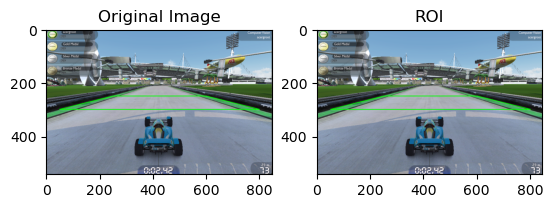

In [17]:
def draw_road_roi(img):
    height, width = img.shape[0], img.shape[1]

    # Define a triangle that captures the road area in front of the car
    # triangle = np.array([
    #     [(int(width * 0.1), height),           # Bottom-left: 10% from the left of the frame
    #      (int(width * 0.5), int(height * 0.6)), # Top-middle: center of the frame, 60% up
    #      (int(width * 1.2), height)]           # Bottom-right: 90% from the left of the frame
    # ], np.int32)
    # HARDCODE
    roi_points = np.array([
    [((250), (250)),    # Top-left corner
     ((600), (250)),    # Top-right corner     
     ((800), (300)),    # Bottom-right corner
     ((50),  (300))]    # Bottom-left corner    
    ], np.int32)

    # Draw the triangle on the image for visualization
    cv.polylines(img, [roi_points], isClosed=True, color=(0, 255, 0), thickness=2)
    return img

# Example usage:
# img_cvt = takeSS()  # Capture screenshot and convert


# cv.imshow("Road Roi", img_with_triangle)
# cv.waitKey(0)
# cv.destroyAllWindows()
img = cv.imread('D:/Thinkin in programming/Metopen/my_game_screenshots/screenshot_5.png')
img_with_triangle = draw_road_roi(img)
    
    
    # skyview = cv.warpPerspective(img, matrix, (width, height))

    # return skyview
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_with_triangle, cv.COLOR_BGR2RGB))
plt.title("ROI")

plt.show()


Coordinate Explanation:
* (int(width * 0.1), height) defines the bottom-left point of the triangle (10% of the frame width from the left, and at the bottom).
* (int(width * 0.5), int(height * 0.5)) is the top-middle point of the triangle (center of the width, and 50% down from the top).
* (int(width * 0.9), height) is the bottom-right point of the triangle (90% of the frame width from the left, and at the bottom).
How to Adjust the Triangle:
Visually Inspect the Lane:

Run the program and see where the triangle is placed. 
1. Adjust the width * 0.1 and width * 0.9 values to move the triangle left or right.
2. Adjust height * 0.5 to raise or lower the top point of the triangle.

# Define the HLD (Hough Line Detection)

In [9]:
def houghlines(img):
    hough_lines = cv.HoughLinesP(
        img,
        rho=6,  # Resolution of the accumulator in pixels
        theta=np.pi / 100,  # Angle resolution in radians
        threshold=150,  # Minimum number of intersecting points
        minLineLength=30,  # Minimum length of a line
        maxLineGap=10  # Maximum allowed gap between line segments
    )
    return hough_lines

# Reference

In [1]:
import numpy as np
import cv2 as  cv

# img = cv.imread('C:/Users/acer/Downloads/sudoku.png')
img = cv.imread('D:/Thinkin in programming/Metopen/Roi_img.jpg')
grays = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(grays, (5, 5),0)
edges = cv.Canny(blur, 30,100,apertureSize=3)

lines = cv.HoughLinesP(edges, 6, np.pi/80, threshold=100, minLineLength=40, maxLineGap=25)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
# lines = cv.HoughLines(edges,1,np.pi/180,100)
# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000 * (-b))
#     y1 = int(y0 + 1000 * (a))
#     x2 = int(x0 - 1000 * (-b))
#     y2 = int(y0 - 1000 * (a))

#     cv.line(img, (x1,y1), (x2,y2),(0,0,255),2)

cv.imshow("line",img)
cv.waitKey(0)
cv.destroyAllWindows()


# Histogram
https://github.com/Infinem/Invenimus-Project/blob/master/lane_detection_with_memory/lane_detection_algorithm.py

In [14]:
def histogram (img):
    histogram = np.sum(img, axis = 0)

    # Find mid point on histogram
    midpoint = np.int32(histogram.shape[0]/2)

    # Compute the left max
    left_X = np.argmax(histogram[:midpoint])
    right_X = np.argmax(histogram[midpoint:]) + midpoint

    return left_X, right_X


with the following arguments:
* dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
* lines: A vector that will store the parameters (r,θ) of the detected lines
* rho : The resolution of the parameter r in pixels. We use 1 pixel.
* theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
* threshold: The minimum number of intersections to "*detect*" a line
* srn and stn: Default parameters to zero. Check OpenCV reference for more info.

# Perspective Correction 

(https://medium.com/nerd-for-tech/lane-detection-with-opencv-part-1-ad9ea5758c07)

If we were flying over the road, and watching it from a bird’s eye view, the lanes would be parallel, but in the picture, they are not, because of the perspective.
The perspective depends on the focal length of the lens (lenses with a shorter focal length show a stronger perspective) and the position of the camera. Once the camera is mounted on a car, the perspective is fixed, so we can take it into consideration and correct the image.
OpenCV has a method to compute the perspective transformation:
**getPerspectiveTransform().**

# Perspective Transform

https://www.youtube.com/watch?v=f41AAKV2CFM&list=PLbv11v7kH7vU85BfOS65HA8DjKgxu5hi9&index=5

Source points (trapezoid): You have four points on the game screen that define the trapezoidal region you want to transform (e.g., the area in front of the car).

Destination points (rectangle): These points should map the trapezoid into a rectangle (the skyview). The top corners of the trapezoid should become the top corners of the rectangle, and the bottom corners of the trapezoid should become the bottom corners of the rectangle.

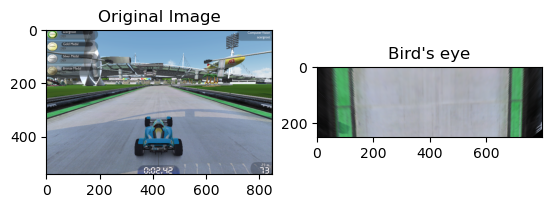

In [14]:
def perspective():

    # Get the height and width of the image.
    # height, width = img.shape[:2]  # Use [:2] to account for color images
    
   
    # The offset ensures that the bird's-eye view isn't stretched too much.
    offset = 70

    # Perspective points (source points) from the original image.
    # These are the four points you want to transform from the source image.
    source_points = np.array([
        [250, 250],   # Top-left corner
        [600, 250],   # Top-right corner     
        [800, 300],   # Bottom-right corner
        [50, 300]     # Bottom-left corner    
    ], np.float32)  # Use float32 for getPerspectiveTransform

    # The destination points for the perspective transform, where you want
    # the source points to be mapped to in the resulting image.
    # The offset is used to shrink the window a bit.
    destination_points = np.array([
        [offset, 0],          # Top-left corner
        [800 - offset, 0],        # Top-right corner
        [800 - offset, 250],           # Bottom-left corner
        [offset, 300]    # Bottom-right corner
    ], np.float32)
    # Changed the data type to np.float32 for both source_points and destination_points,
    # which is required by cv.getPerspectiveTransform.

    # Create the perspective transformation matrix using the source points 
    # and the destination points.
    matrix = cv.getPerspectiveTransform(source_points, destination_points)
    matrix_inv = cv.getPerspectiveTransform(destination_points, source_points)
    return matrix, matrix_inv

    # Apply the perspective warp transformation to the image, generating a 
    # "skyview" of the image.
def front_to_top(img):
    M,_ =  perspective()
    size = (800, 300)

    return cv.warpPerspective(img, M, size, flags=cv.INTER_LINEAR)
def top_to_front(img):
    _,m_inv = perspective()
    size = (800, 300)

    return cv.warpPerspective(img, m_inv, size, flags=cv.INTER_LINEAR)


img = cv.imread('D:/Thinkin in programming/Metopen/my_game_screenshots/screenshot_5.png')
output = front_to_top(img)
# cv.imshow('img',img)
# cv.imshow('image', output)
# cv.waitKey(0)
    
    
    # skyview = cv.warpPerspective(img, matrix, (width, height))

    # return skyview
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title("Bird's eye")

plt.show()


# Line Optimization

In [10]:
def make_points(img, lineSI):
    slope, intercept = lineSI
    # height = roi_bottom  # Use the bottom coordinate of the ROI
    y1 = int(img.shape[0])  # Bottom of the ROI
    y2 = int(y1 * 0.5)  # Extend the line slightly beyond the bottom of the ROI

    # Calculate x coordinates based on slope and intercept
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)

    return [[x1, y1, x2, y2]]  # Return the points in the format required by cv.line


# Before running this code below, you need to make sure that the line of the lane and the car
# is already correct. Specify the correct region of interest first
def average_slope_intercepts(img, lines):
    
    # lane_lines = [] # Both lines

    left_fit = []
    right_fit = []
    
    if lines is None:
        return None
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            # Check for a valid line length (avoid horizontal/vertical short lines)
            fit = np.polyfit((x1, x2), (y1, y2), 1)
            slope = fit[0]
            intercept = fit[1]
            # Filter based on slope: negative for left, positive for right
            if slope < 0:  # Left lane
                left_fit.append((slope, intercept))
            elif slope > 0:  # Right lane
                right_fit.append((slope, intercept))
            # if abs(x2 - x1) > 0 and abs(y2 - y1) > 0:  
                
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(img, left_fit_average)
    right_line = make_points(img, right_fit_average)
    average_lines = [left_line, right_line]
    
    # # Average fits
    # if left_fit:
    #     left_fit_average = np.average(left_fit, axis=0)
    # else:
    #     left_fit_average = None

    # if right_fit:
    #     right_fit_average = np.average(right_fit, axis=0)
    # else:
    #     right_fit_average = None

    # # Generate lines only if averages are available
    # average_lines = []
    # if left_fit_average is not None:
    #     left_line = make_points(img, left_fit_average, roi_bottom)
    #     average_lines.append(left_line)
    # if right_fit_average is not None:
    #     right_line = make_points(img, right_fit_average, roi_bottom)
    #     average_lines.append(right_line)

    return average_lines


def display_lines_average(img, lines):
    # line_image = [0]
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv.line(line_image, (x1,y1), (x2,y2), (0,0,255),10)
    # return img
    return line_image

In [8]:
# img = takeSS()
img = cv.imread("D:/Thinkin in programming/Metopen/my_game_screenshots/screenshot_47.png")
image = np.copy(img)

canny_edge = canny_edge_detection(image)
masked_image = roi(canny_edge)

wrap = perspective_wrapping(canny_edge)

left_x, right_x = histogram(wrap)
# cv.imshow("hist",left_x,right_x)

cv.imshow("canny",canny_edge)
cv.imshow("wrap",wrap)
cv.imshow("ROI",masked_image)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'perspective_wrapping' is not defined

In [12]:
# img = takeSS()
img = cv.imread("D:/Thinkin in programming/Metopen/my_game_screenshots/screenshot_47.png")
image = np.copy(img)
canny_image = canny_edge_detection(image)
masked_image =  roi(canny_image)

# wrap = perspective_wrapping(masked_image)
h_lines = houghlines(masked_image)
# h_lines = houghlines(wrap)
# cv.imshow("",wrap)
# cv.waitKey

# Call the line function
avg_lines = average_slope_intercepts(img, h_lines)
lines_image = display_lines_average(image, avg_lines)

# print(avg_lines)
# print(h_lines)
merge_image = cv.addWeighted(img, 0.8, lines_image, 1,1)
cv.imshow("result",merge_image)
cv.waitKey(0)
cv.destroyAllWindows()

# cv.imshow("win",lines_image)
# cv.imshow("win",canny_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

def average_slope_intercepts(img, lines):

sometimes(in most cases actually) it detects multiple lines.  to overcome this, we can use the average value within the lines as you’ve seen in this code.

bear in minds that, the lines (you can see at the ros function) is a lot of them. So you need to specify that only certain lines that is captured.

# Turn Detection

The main logic of this part is to make turn prediction using the central point between two lines.

https://medium.com/@SunEdition/lane-detection-and-turn-prediction-algorithm-for-autonomous-vehicles-6423f77dc841

https://github.com/Infinem/Invenimus-Project/blob/master/lane_detection_with_memory/lane_detection_algorithm.py

In [ ]:
# What is this for?

def display_heading_line(img, up_center, low_center):
    # Draw a line from the top center to the bottom center
    heading_image = np.zeros_like(img)
    height, width, _ = img.shape
    
    x1 = int(low_center)
    y1 = height
    x2 = int(up_center)
    y2 = int(height*0.72)
    
    cv.line(heading_image, (x1, y1), (x2, y2), (0, 0, 255), 5)
    heading_image = cv.addWeighted(img, 0.8, heading_image, 1, 1)
    
    return heading_image

In [ ]:
def add_text(frame, image_center, left_x_base, right_x_base):
    """ Function for text outputing
    Output the direction of turn"""

    lane_center = left_x_base + (right_x_base - left_x_base) / 2 # Find lane center between two lines
    
    deviation = image_center - lane_center    # Find the deviation

    if deviation > 160:         # Prediction turn according to the deviation
        text = "Smooth Left"
        memory_text = text
    elif deviation < 40 or deviation > 150 and deviation <= 160:
        text = "Smooth Right"
        memory_text = text
    elif deviation >= 40 and deviation <= 150:
        text = "Straight"
        memory_text = text
    else:
        text = memory_text
    
    cv.putText(frame, "DIRECTION: " + text, (50, 50), cv.FONT_HERSHEY_DUPLEX, 1, (255, 0, 0), 2, cv.LINE_AA) # Draw direction
    
    return frame    # Retrun frame with the direction on it

# Camera Calibration (Optional)

Because you are using game screenshots, this process is preety much optional

https://www.youtube.com/watch?v=Rmy2HRtYTYw&list=PLbv11v7kH7vU85BfOS65HA8DjKgxu5hi9&index=3

https://medium.com/analytics-vidhya/camera-calibration-with-opencv-f324679c6eb7

In [2]:
nx = 7
ny = 7

img = cv.imread('D:/Thinkin in programming/Metopen/Chess_board/chess_board.png')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# conver to grayscale
# cv.imshow('img',img)
# cv.waitKey(0)
ret, corners = cv.findChessboardCorners(img_gray, (nx,ny), None)
if ret == True:
    cv.drawChessboardCorners(img, (nx,ny), corners, ret)
    cv.imshow('img',img)
    cv.waitKey(0)

# Sliding Window

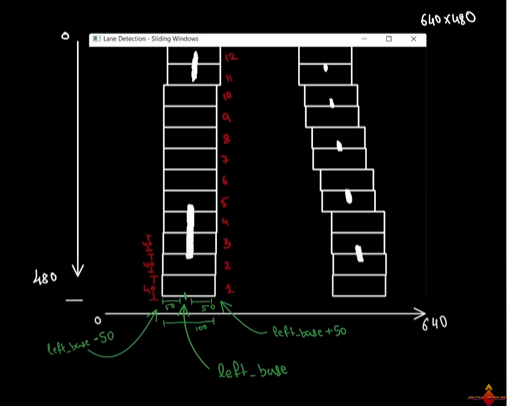

In [ ]:
def sliding_window(img):
    y = 450
    lx = []
    rx = []
    

In [ ]:
# # Declaring variables for fps
#     avg_fps = 0
#     fps_list = []
    
#     start_time = time.time()    # Start the timer

#     edges = detect_edges(frame)

#     denoised_frame = denoise_frame(frame)   # Denoise frame from artifacts

#     canny_edges = detect_edges(denoised_frame)  # Find edges on the frame

#     roi_frame = region_of_interest(canny_edges)   # Draw region of interest

#     warped_frame = warp_perspective(canny_edges)    # Warp the original frame, make it skyview
#     left_x_base, right_x_base = histogram(warped_frame)         # Take x bases for two lines
#     lines = detect_lines(roi_frame)                 # Detect lane lines on the frame
#     lane_lines = optimize_lines(frame, lines)       # Optimize detected line
#     mul_lines = display_lines(frame, lines)
#     lane_lines_image = display_lines(frame, lane_lines) # Display solid and optimized lines
    
#     up_center, low_center = get_floating_center(frame, lane_lines) # Calculate the center between two lines

#     heading_line = display_heading_line(lane_lines_image, up_center, low_center)

#     final_frame = add_text(heading_line, low_center, left_x_base, right_x_base) # Predict and draw turn

#     fps = round(1.0 / (time.time() - start_time), 1)    # Here we calculate the fps
#     fps_list.append(fps)           # Append fps to fps list
#     cv2.putText(final_frame, "FPS: " + str(fps), (50, 100), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA) # Draw FPS

#     if len(fps_list) == 60: # Calculate avg fps every timestamp
#         avg_fps = round(sum(fps_list) / len(fps_list), 1)   # Averaging existing fps in the list
#         fps_list = []
#     cv2.putText(final_frame, "AVG FPS: " + str(avg_fps), (50, 150), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA) # Draw AVG FPS
    

# Direct Input

In [6]:
import time
import pyautogui as py
import pydirectinput

# Function to click at specified coordinates (using PyAutoGUI)
def click(x, y):
    py.click(x, y)  # Click at the specified coordinates
    time.sleep(0.5)  # Wait briefly to ensure the game is focused
    
def accelerate(hold_time):
    start = time.time()
    while time.time() - start < hold_time:
        pydirectinput.keyDown('up')
    pydirectinput.keyUp('up')

def turnLeft(hold_time):
    start = time.time()
    while time.time() - start < hold_time:
        pydirectinput.keyDown('a')
    pydirectinput.keyUp('a')

def turnRight(hold_time):
    start = time.time()
    while time.time() - start < hold_time:
        pydirectinput.keyDown('d')
    pydirectinput.keyUp('d')

# Accelerate for 10 seconds, then turn left and right
click(409, 275)
accelerate(10)
turnLeft(0.3)
turnRight(0.3)